Импорт библиотек    

In [1]:

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')


Загрузка и первичный анализ данных

In [2]:
df = pd.read_csv('data/Physical_Activity_Monitoring_unlabeled.csv')

print(f"Размер датасета: {df.shape}")
display(df.head())
print("\nТипы данных:")
print(df.dtypes)
print("\nКоличество пропущенных значений:")
print(df.isnull().sum())
display(df.info())
display(df.describe())


Размер датасета: (534601, 53)


,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,252.75,34.8750,0.902847,7.45872,6.032490,1.006100,7.44575,6.303650,-0.021952,0.004114,...,-0.025606,0.030239,-14.5447,27.3336,-5.76620,0.206416,0.348212,0.763201,-0.503652,5
1,3652.45,29.7500,-4.069330,3.76168,8.279720,-5.972500,3.22273,6.908970,0.116054,-0.375968,...,-0.670163,1.786200,-32.8257,-15.7719,-1.31395,0.578332,-0.566734,0.405888,-0.423791,2
2,504.76,34.3750,-2.007540,-9.60180,0.773674,-1.803500,-9.58937,1.073680,0.020131,0.042189,...,-0.009741,-0.006579,-18.8171,16.3089,25.29280,0.139776,0.676586,0.393796,0.606316,8
3,2801.61,31.9375,-13.262200,5.85443,0.899334,-13.611500,5.91511,0.840377,1.715630,-0.050492,...,-0.163470,-3.495570,-26.7418,34.3566,21.32740,0.416303,0.783387,0.306464,0.345075,2
4,441.01,33.5000,-0.013940,8.66540,4.398210,0.144153,8.56816,4.822200,-0.006938,-0.007383,...,-0.028172,-0.003737,-17.7798,-3.9981,10.99500,0.171133,-0.748343,0.252988,-0.588807,6



Типы данных:
timestamp            float64
handTemperature      float64
handAcc16_1          float64
handAcc16_2          float64
handAcc16_3          float64
handAcc6_1           float64
handAcc6_2           float64
handAcc6_3           float64
handGyro1            float64
handGyro2            float64
handGyro3            float64
handMagne1           float64
handMagne2           float64
handMagne3           float64
handOrientation1     float64
handOrientation2     float64
handOrientation3     float64
handOrientation4     float64
chestTemperature     float64
chestAcc16_1         float64
chestAcc16_2         float64
chestAcc16_3         float64
chestAcc6_1          float64
chestAcc6_2          float64
chestAcc6_3          float64
chestGyro1           float64
chestGyro2           float64
chestGyro3           float64
chestMagne1          float64
chestMagne2          float64
chestMagne3          float64
chestOrientation1    float64
chestOrientation2    float64
chestOrientation3    float64


None

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
count,534601.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,...,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,534601.000000
mean,1593.538159,32.451221,-4.435286,3.241949,4.079375,-4.375896,3.218250,4.262513,-0.008852,0.028801,...,-0.031911,0.002304,-28.756284,2.115624,14.723345,0.360159,-0.091093,0.303517,-0.173845,4.558615
std,1243.906483,1.754847,7.062004,7.224031,3.831257,7.068961,6.864782,3.822053,1.160112,0.926832,...,0.618840,2.036102,19.303887,22.253170,17.907491,0.301254,0.559400,0.344271,0.466304,2.318076
min,37.660000,27.500000,-114.755000,-82.550900,-73.949700,-61.214700,-61.824200,-61.577100,-19.690500,-7.609010,...,-7.701040,-14.019600,-172.865000,-136.951000,-102.716000,0.000003,-0.954848,-0.876838,-0.997040,1.000000
25%,475.500000,31.312500,-9.076360,0.682775,1.588777,-8.981072,0.687587,1.780160,-0.153182,-0.083315,...,-0.049003,-0.221911,-39.689950,-10.960850,2.252230,0.145023,-0.676392,0.006839,-0.580040,2.000000
50%,827.610000,32.875000,-5.465610,3.089205,4.157125,-5.434845,3.127145,4.413625,-0.004439,0.004013,...,-0.004481,0.000354,-26.285600,-0.014372,16.599500,0.240996,0.000000,0.322698,-0.281681,5.000000
75%,2876.990000,33.812500,0.383679,5.559742,6.864212,0.424770,5.592180,7.148178,0.130310,0.094342,...,0.048972,0.032649,-14.549500,19.245900,25.947100,0.501671,0.410052,0.594198,0.252247,7.000000
max,4007.730000,35.250000,60.912600,155.532000,78.480100,34.159400,62.259800,60.843700,22.960000,11.862600,...,6.002540,14.482700,41.764800,92.867000,122.521000,1.000000,0.959538,0.920506,0.996105,8.000000


Анализ структуры датасета

In [3]:
df.nunique().sort_values(ascending=False)

chestGyro2           485179
handGyro1            484555
chestGyro1           477658
ankleGyro2           477406
ankleGyro3           476114
chestGyro3           472890
handGyro2            471432
handGyro3            465175
ankleGyro1           455470
chestAcc6_1          410501
chestOrientation3    409234
chestAcc6_3          397096
handAcc6_2           392738
handOrientation2     389853
handOrientation4     385679
chestOrientation4    373849
chestMagne1          372094
handOrientation3     370752
handAcc6_3           369648
handAcc16_2          368754
handAcc16_3          359286
handMagne1           358261
handAcc6_1           355762
chestOrientation2    354816
handMagne2           352969
chestMagne3          348616
handOrientation1     347381
ankleMagne2          344822
chestAcc16_3         343830
ankleOrientation3    343657
ankleOrientation4    340920
ankleAcc6_3          335619
ankleOrientation2    333935
chestAcc16_1         333373
handAcc16_1          333029
handMagne3          

Из первичного анализа данных, можем сделать следующие выводы:
Есть следующие признаки: Сенсоры по локациям: hand, chest, ankle
Температура (Temperature)
Акселерометры (Acc16_, Acc6_)
Гироскопы (Gyro)
Магнитометры (Magne)
Ориентация (Orientation)
Все числовые признаки: float64, один — subject_id (int64).

Есть от 800 до 4000 пропущенных значений на каждый сенсорный блок.

Заполним пропуски

In [4]:
df_filled = df.copy()
features_to_fill = df.columns.difference(['timestamp', 'subject_id'])

df_filled[features_to_fill] = df.groupby('subject_id')[features_to_fill].transform(lambda x: x.fillna(x.mean()))
print("Осталось пропусков после заполнения:", df_filled.isnull().sum().sum())

Осталось пропусков после заполнения: 0


Сделаем стандартизацию данных, чтобы привести все признаки к одному масштабу

In [5]:
df_prepared = df_filled.copy()

X = df_prepared.drop(columns=['timestamp']) 

# при стандартизации — не включаем subject_id
X_for_scaling = X.drop(columns=['subject_id'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_for_scaling)

# Возвращаем subject_id в датасет с результатом стандартизации
subject_ids = X['subject_id'].values


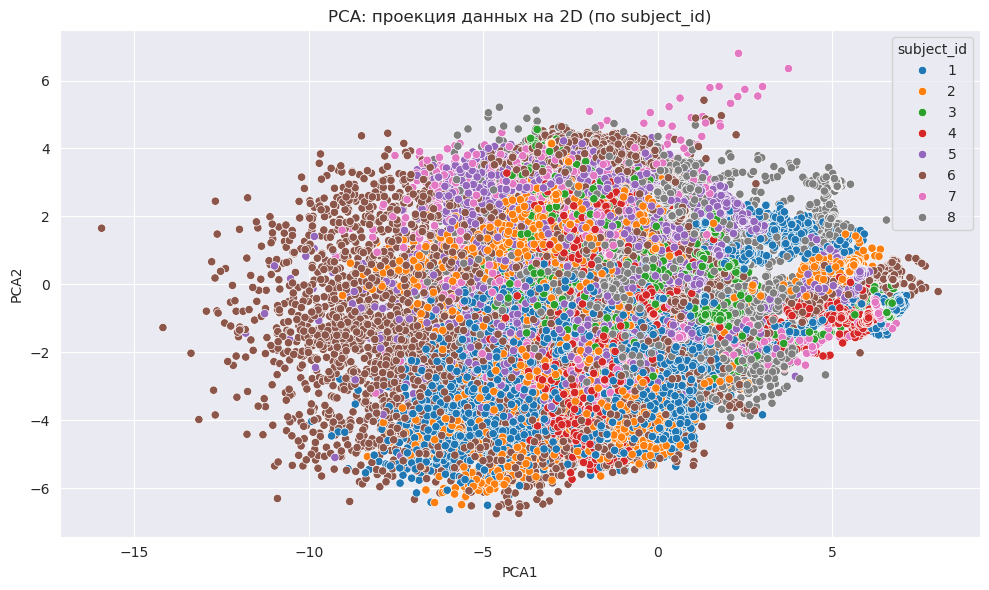

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Визуализация
df_pca = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'subject_id': subject_ids
})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='subject_id', palette='tab10', legend='full')
plt.title("PCA: проекция данных на 2D (по subject_id)")
plt.grid(True)
plt.tight_layout()
plt.show()